In [1]:
%pip install scikit-learn

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 10000
)

len(X_train), len(X_test), len(y_train), len(y_test)

Note: you may need to restart the kernel to use updated packages.


/home/xamanek/.virtualenvs/DLops01/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(60000, 10000, 60000, 10000)

Note: you may need to restart the kernel to use updated packages.


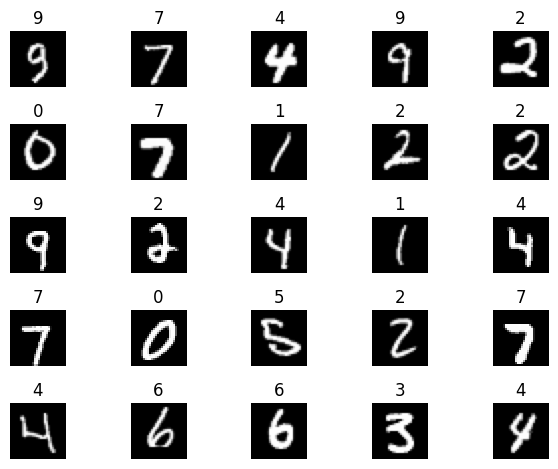

In [2]:
%pip install matplotlib
import matplotlib.pyplot as plt
import random

fig = plt.figure( dpi = 100 )
for ix in range ( 25 ):
    ax = plt.subplot( 5, 5, ix + 1 )
    i = random.randint( 0, len(X_train) - 1 )
    img, label = X_train[i], y_train[i]
    ax.imshow( img.reshape( 28, 28 ), cmap = 'gray' )
    ax.set_title( label )
    ax.axis( 'off' )
plt.tight_layout()
plt.show()

In [3]:
import numpy as np

X_train_3 = X_train[ y_train == '3' ][:100]
X_train_no_3 = X_train[ y_train != '3' ][:100]

len(X_train_3), len(X_train_no_3)

(100, 100)

In [4]:
def plot_samples(X):
    fig = plt.figure(dpi=100)
    for ix in range(25):
        ax = plt.subplot( 5, 5, ix + 1 )
        i = random.randint( 0, len(X)-1 )
        img = X[i]
        ax.imshow( img.reshape( 28, 28), cmap = 'gray' )
        ax.axis( 'off' )
    plt.tight_layout()
    plt.show()

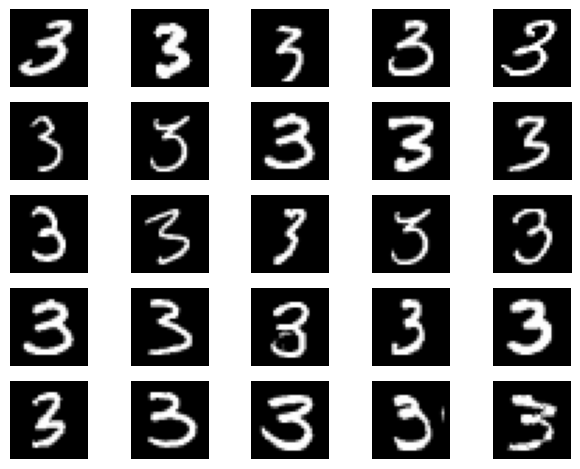

In [5]:
plot_samples(X_train_3)

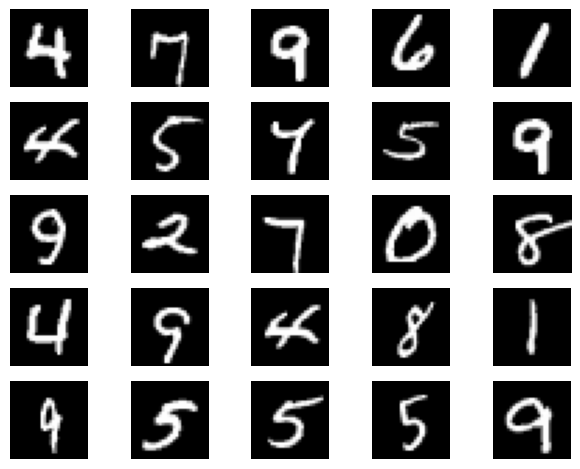

In [6]:
plot_samples(X_train_no_3)

In [20]:
%pip install scikit-image
import os
from pathlib import Path
from skimage.io import imsave
import shutil

path = Path('dataset')

def generate_dataset(X_train_3, X_train_no_3, test_size):
    shutil.rmtree(path)
    #os.makedirs(path, exist_ok=True)
    isExist = os.path.exists(path)
    #print(isExist)
    if not isExist:
        os.makedirs(path)

    splits = ['train', 'test']
    for split in splits:
        os.makedirs( path / split, exist_ok = True )
        os.makedirs( path / split / '3', exist_ok = True )
        os.makedirs( path / split / 'no3', exist_ok = True )
        if split == 'train':
            X1, X2 = X_train_3[:-test_size], X_train_no_3[:-test_size]
        else:
            X1, X2 = X_train_3[-test_size:], X_train_no_3[-test_size:]
        for x1, x2 in zip(X1, X2):
            #imsave( path / split / '3' / f'{random.randint( 0, 99999):05d}.png', x1.reshape( 28, 28 ).astype( 'uint8' ) )
            #imsave( path / split / 'no_3' / f'{random.randint(0, 99999):05d}.png', x2.reshape( 28, 28 ).astype( 'uint8' ) )
            imsave(path / split / '3' / f'{random.randint(0, 99999):05d}.png', x1.reshape(28,28).astype('uint8'))
            imsave(path / split / 'no3' / f'{random.randint(0, 99999):05d}.png', x2.reshape(28,28).astype('uint8'))


Note: you may need to restart the kernel to use updated packages.


In [22]:
generate_dataset( X_train_3, X_train_no_3, 20 )

In [24]:
from glob import glob

def get_paths():
    train_3 = glob( str( path / 'train' / '3' / '*.png' ) )
    train_no3 = glob( str( path / 'train' / 'no3' / '*.png' ) )
    test_3 = glob( str( path / 'test' / '3' / '*.png' ) )
    test_no3 = glob( str( path / 'test' / 'no3' / '*.png' ) )
    return train_3, train_no3, test_3, test_no3

train_3, train_no3, test_3, test_no3 = get_paths()

len(train_3), len(train_no3), len(test_3), len(test_no3)

(80, 80, 20, 20)

In [28]:
from skimage.io import imread

def plot_images(paths):
    #fig = plt.figure(dpi=100)
    for ix in range(25):
        ax = plt.subplot( 5, 5, ix + 1 )
        i = random.randint( 0, len(paths) - 1 )
        img = imread( paths[i] )
        ax.imshow( img, cmap = 'gray' )
        ax.axis( 'off' )

    plt.tight_layout()
    plt.show()

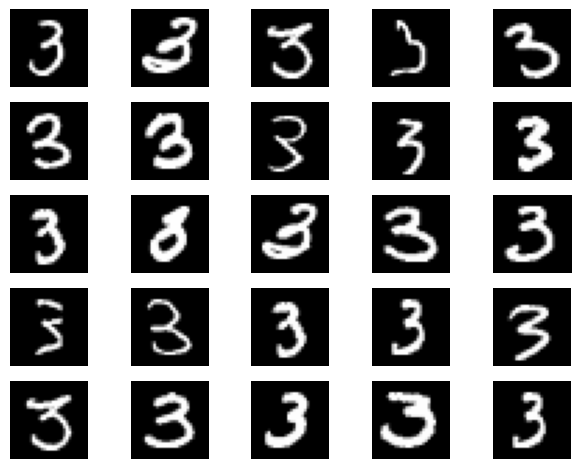

In [29]:
plot_images(train_3)

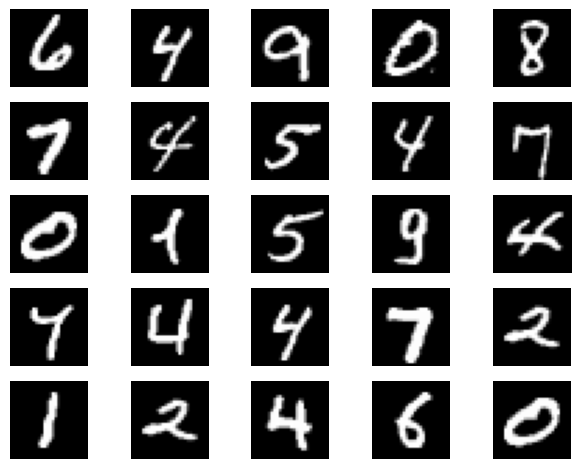

In [30]:
plot_images(train_no3)